Import de les llibreries necessàries

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import category_encoders as ce
import seaborn as sns

Carreguem el dataset

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

#### DESCRIPCIÓ DEL DATASET ####
El dataset consisteix en 20.000 jocs d'escacs de la web Lichess.org

Analitzem el dataset

In [3]:
dataset = load_dataset('games.csv')
data = dataset.values
print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (20058, 16)


In [4]:
dataset.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1504210000000.000,1504210000000.000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000.000,1504130000000.000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000.000,1504130000000.000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000.000,1504110000000.000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000.000,1504030000000.000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [6]:
dataset

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1504210000000.000,1504210000000.000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000.000,1504130000000.000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000.000,1504130000000.000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000.000,1504110000000.000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000.000,1504030000000.000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1499790914342.000,1499791236076.000,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1499698089760.000,1499698833979.000,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1499697877493.000,1499698050327.000,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1499696127019.000,1499697073718.000,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [7]:
dataset.nunique() < 5

id                False
rated              True
created_at        False
last_move_at      False
turns             False
victory_status     True
winner             True
increment_code    False
white_id          False
white_rating      False
black_id          False
black_rating      False
moves             False
opening_eco       False
opening_name      False
opening_ply       False
dtype: bool

Hi ha molts atributs que s'han de transformar a numèrics. Anarf a practica 2 i mirar com fer-ho

In [8]:
dataset.nunique()

id                19113
rated                 2
created_at        13151
last_move_at      13186
turns               211
victory_status        4
winner                3
increment_code      400
white_id           9438
white_rating       1516
black_id           9331
black_rating       1521
moves             18920
opening_eco         365
opening_name       1477
opening_ply          23
dtype: int64

Anem a netejar les dades

Mirem el nombre de valors desconeguts que té cada atribut

In [9]:
llargada= len(dataset)

print("id:", (int(len(dataset[dataset["id"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["id"]=="?"])))/llargada)*100, 1),"%")

print("rated:", (int(len(dataset[dataset["rated"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["rated"]=="?"])))/llargada)*100, 1),"%")

print("created at:", (int(len(dataset[dataset["created_at"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["created_at"]=="?"])))/llargada)*100, 1),"%")

print("last move at:", (int(len(dataset[dataset["last_move_at"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["last_move_at"]=="?"])))/llargada)*100, 1),"%")

print("turns:", (int(len(dataset[dataset["turns"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["turns"]=="?"])))/llargada)*100, 1),"%")

print("victory status:", (int(len(dataset[dataset["victory_status"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["victory_status"]=="?"])))/llargada)*100, 1),"%")

print("winner:", (int(len(dataset[dataset["winner"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["winner"]=="?"])))/llargada)*100, 1),"%")

print("increment code:", (int(len(dataset[dataset["increment_code"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["increment_code"]=="?"])))/llargada)*100, 1),"%")

print("white rating:", (int(len(dataset[dataset["white_rating"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["white_rating"]=="?"])))/llargada)*100, 1),"%")

print("white id:", (int(len(dataset[dataset["white_id"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["white_id"]=="?"])))/llargada)*100, 1),"%")

print("black rating:", (int(len(dataset[dataset["black_rating"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["black_rating"]=="?"])))/llargada)*100, 1),"%")

print("black id:", (int(len(dataset[dataset["black_id"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["black_id"]=="?"])))/llargada)*100, 1),"%")

print("moves:", (int(len(dataset[dataset["moves"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["moves"]=="?"])))/llargada)*100, 1),"%")

print("opening eco:", (int(len(dataset[dataset["opening_eco"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["opening_eco"]=="?"])))/llargada)*100, 1),"%")

print("opening name:", (int(len(dataset[dataset["opening_name"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["opening_name"]=="?"])))/llargada)*100, 1),"%")

print("opening ply:", (int(len(dataset[dataset["opening_ply"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["opening_ply"]=="?"])))/llargada)*100, 1),"%")


id: 0 valors desconeguts,  0.0 %
rated: 0 valors desconeguts,  0.0 %
created at: 0 valors desconeguts,  0.0 %
last move at: 0 valors desconeguts,  0.0 %
turns: 0 valors desconeguts,  0.0 %
victory status: 0 valors desconeguts,  0.0 %
winner: 0 valors desconeguts,  0.0 %
increment code: 0 valors desconeguts,  0.0 %
white rating: 0 valors desconeguts,  0.0 %
white id: 0 valors desconeguts,  0.0 %
black rating: 0 valors desconeguts,  0.0 %
black id: 0 valors desconeguts,  0.0 %
moves: 0 valors desconeguts,  0.0 %
opening eco: 0 valors desconeguts,  0.0 %
opening name: 0 valors desconeguts,  0.0 %
opening ply: 0 valors desconeguts,  0.0 %


Convwerteixo els aatributs de text en numèrics (preprocessing)

In [10]:
# Transformar l'atribut rated a binari (True = 1, False = 0)
dataset["rated_bi"] = np.where(dataset["rated"] == True , 1, 0)

In [11]:
# Transformació dels atributs 'created_at' i 'last_move_at' en un de únic anomenat game_lenght

# Aquests dos atruibuts estan representats com a unix time, així que s'ha de convertir el resultat de la resta 
#per tenir-ho en minuts

dataset["game_length"] = (dataset["last_move_at"] - dataset["created_at"]).apply(lambda x : round(x / 1000 / 60, 2))

In [12]:
d1 = dataset["victory_status"].unique()

In [13]:
d2 = np.array(dataset["victory_status"])

In [14]:
d1[0] == d2[0]

True

In [15]:
# En el cas de l'atribut 'victory_status', com que conté dades nominals el camí a seguir per transformar a dades nominals
# és mitjançant 'one-hot encoding'.

encoder = ce.OneHotEncoder(cols="victory_status",handle_unknown='return_nan',return_df=True,use_cat_names=True)

dataset = encoder.fit_transform(dataset)
dataset

,id,rated,created_at,last_move_at,turns,victory_status_outoftime,victory_status_resign,victory_status_mate,victory_status_draw,winner,...,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rated_bi,game_length
0,TZJHLljE,False,1504210000000.000,1504210000000.000,13,1.000,0.000,0.000,0.000,white,...,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0,0.000
1,l1NXvwaE,True,1504130000000.000,1504130000000.000,16,0.000,1.000,0.000,0.000,black,...,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1,0.000
2,mIICvQHh,True,1504130000000.000,1504130000000.000,61,0.000,0.000,1.000,0.000,white,...,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1,0.000
3,kWKvrqYL,True,1504110000000.000,1504110000000.000,61,0.000,0.000,1.000,0.000,white,...,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1,0.000
4,9tXo1AUZ,True,1504030000000.000,1504030000000.000,95,0.000,0.000,1.000,0.000,white,...,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1499790914342.000,1499791236076.000,24,0.000,1.000,0.000,0.000,white,...,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,1,5.360
20054,WSJDhbPl,True,1499698089760.000,1499698833979.000,82,0.000,0.000,1.000,0.000,black,...,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,1,12.400
20055,yrAas0Kj,True,1499697877493.000,1499698050327.000,35,0.000,0.000,1.000,0.000,white,...,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,1,2.880
20056,b0v4tRyF,True,1499696127019.000,1499697073718.000,109,0.000,1.000,0.000,0.000,white,...,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,1,15.780


In [16]:
# Creo un atribut anomenat 'rating_dist' que serà la diferència de 'rating' dels dos jugadors
dataset['rating_dist'] = abs(dataset['white_rating'] - dataset['black_rating'])
dataset.head()

,id,rated,created_at,last_move_at,turns,victory_status_outoftime,victory_status_resign,victory_status_mate,victory_status_draw,winner,...,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rated_bi,game_length,rating_dist
0,TZJHLljE,False,1504210000000.000,1504210000000.000,13,1.000,0.000,0.000,0.000,white,...,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0,0.000,309
1,l1NXvwaE,True,1504130000000.000,1504130000000.000,16,0.000,1.000,0.000,0.000,black,...,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1,0.000,61
2,mIICvQHh,True,1504130000000.000,1504130000000.000,61,0.000,0.000,1.000,0.000,white,...,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1,0.000,4
3,kWKvrqYL,True,1504110000000.000,1504110000000.000,61,0.000,0.000,1.000,0.000,white,...,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1,0.000,15
4,9tXo1AUZ,True,1504030000000.000,1504030000000.000,95,0.000,0.000,1.000,0.000,white,...,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1,0.000,54


Data exploration

In [17]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
created_at,20058.000,1483616852629.092,28501509421.005,1376771633173.000,1477547500000.000,1496010000000.000,1503170000000.000,1504493143790.000
last_move_at,20058.000,1483617722336.144,28501400588.890,1376771863841.000,1477547500000.000,1496010000000.000,1503170000000.000,1504493827262.000
turns,20058.000,60.466,33.571,1.000,37.000,55.000,79.000,349.000
victory_status_outoftime,20058.000,0.084,0.277,0.000,0.000,0.000,0.000,1.000
victory_status_resign,20058.000,0.556,0.497,0.000,0.000,1.000,1.000,1.000
victory_status_mate,20058.000,0.315,0.465,0.000,0.000,0.000,1.000,1.000
victory_status_draw,20058.000,0.045,0.208,0.000,0.000,0.000,0.000,1.000
white_rating,20058.000,1596.632,291.253,784.000,1398.000,1567.000,1793.000,2700.000
black_rating,20058.000,1588.832,291.036,789.000,1391.000,1562.000,1784.000,2723.000
opening_ply,20058.000,4.817,2.797,1.000,3.000,4.000,6.000,28.000


In [18]:
# Anem a visualitzar les dades

In [19]:
# Una cosa que destaca al mirar la descripció del dataset és que la mitjana del primer 25% de l'atribut 'game_length' és 0
# Això no té sentit així que anem a visualitzar l'atribut

<IPython.core.display.Javascript object>


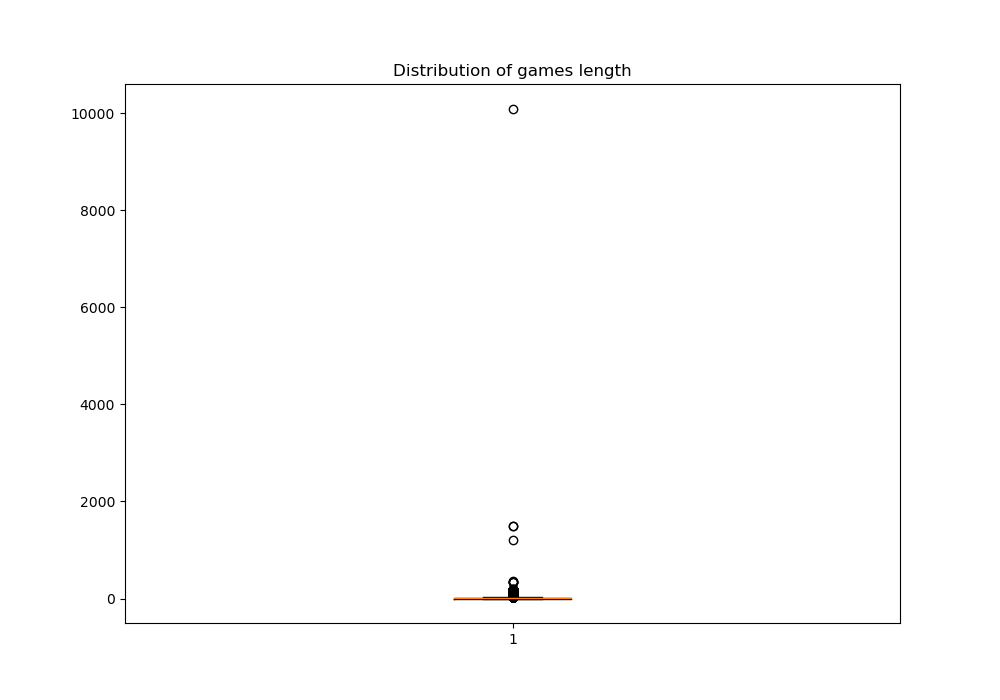

In [20]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(dataset['game_length'])
plt.title('Distribution of games length')
plt.show()

<IPython.core.display.Javascript object>


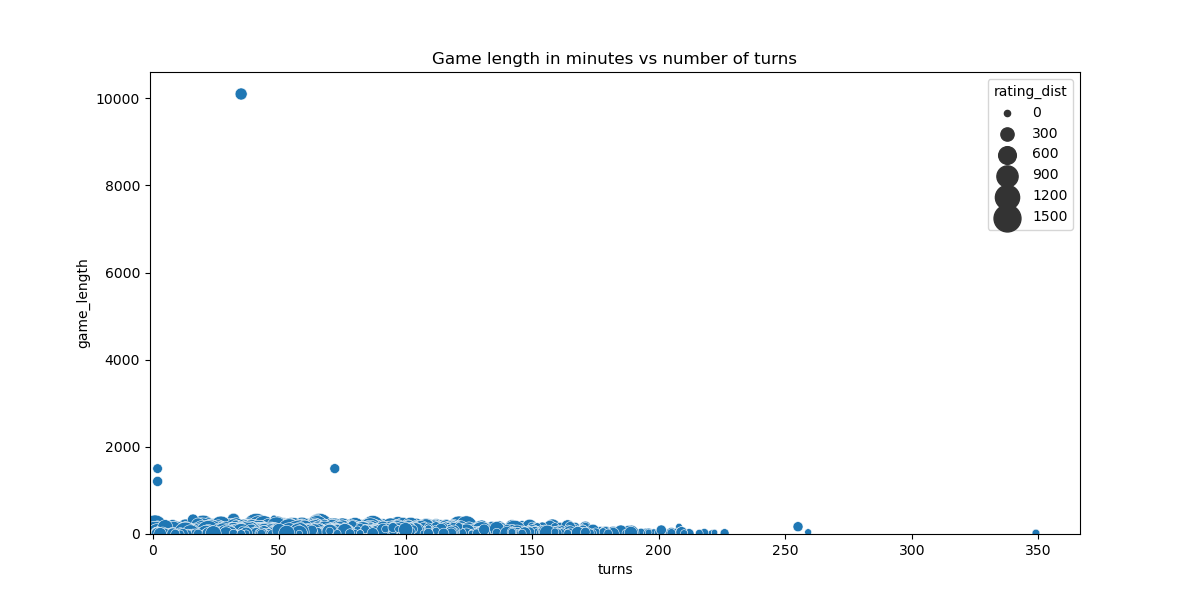

In [21]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=dataset, x='turns', y='game_length', size='rating_dist', sizes=(20, 400))

plt.title('Game length in minutes vs number of turns')
plt.xlim((-1))
plt.ylim((-1))

plt.show()

In [22]:
# Veiem clarament que hi ha un outlier
outlier = dataset[dataset["game_length"] > 10000]
outlier

,id,rated,created_at,last_move_at,turns,victory_status_outoftime,victory_status_resign,victory_status_mate,victory_status_draw,winner,...,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rated_bi,game_length,rating_dist
10754,eyhzu8aj,False,1389882733749.000,1390488578450.000,35,0.000,1.000,0.000,0.000,white,...,1245,miladghasemi,1011,d4 f6 Nf3 e5 e3 Nc6 Nc3 d5 Nb5 Qd7 Bd2 a6 Na3 ...,A40,Queen's Pawn,1,0,10097.410,234


<IPython.core.display.Javascript object>


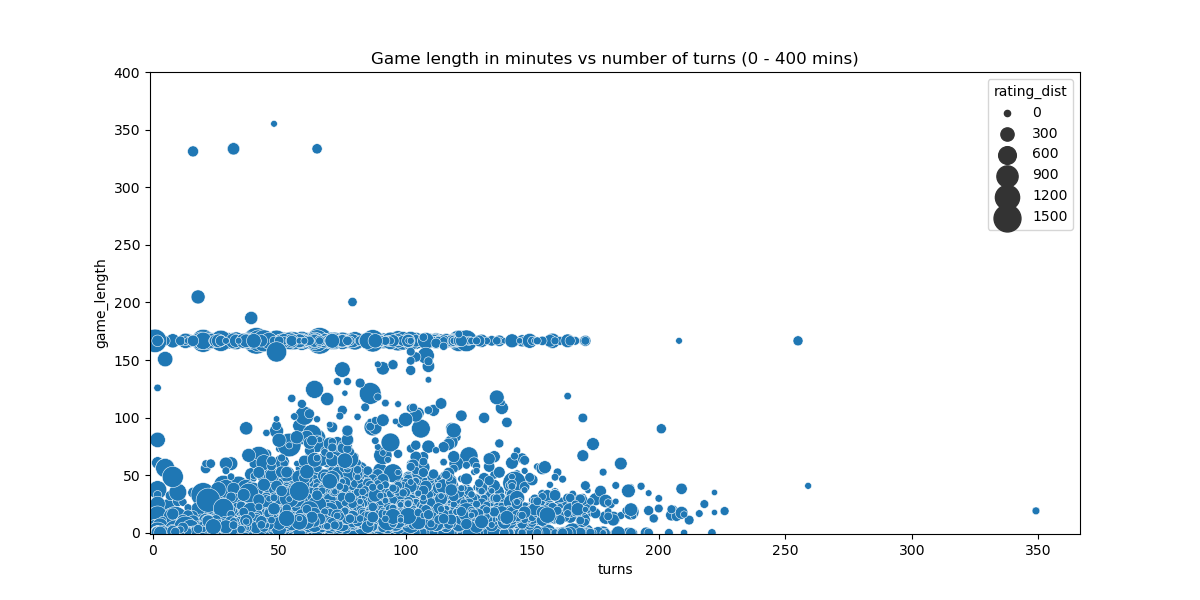

In [23]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=dataset, x='turns', y='game_length', size='rating_dist', sizes=(20, 400))

plt.title('Game length in minutes vs number of turns (0 - 400 mins)')
plt.xlim((-1))
plt.ylim((-1, 400))

plt.show()

<IPython.core.display.Javascript object>


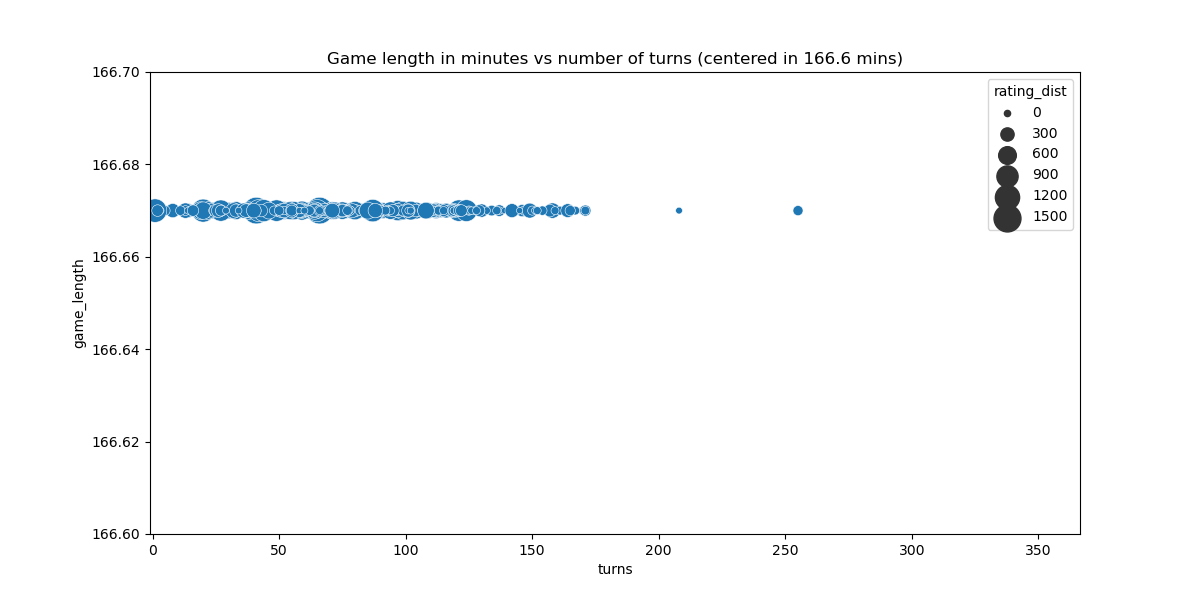

In [24]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=dataset, x='turns', y='game_length', size='rating_dist', sizes=(20, 400))

plt.title('Game length in minutes vs number of turns (centered in 166.6 mins)')
plt.xlim((-1))
plt.ylim((166.6, 166.7))

plt.show()

<IPython.core.display.Javascript object>


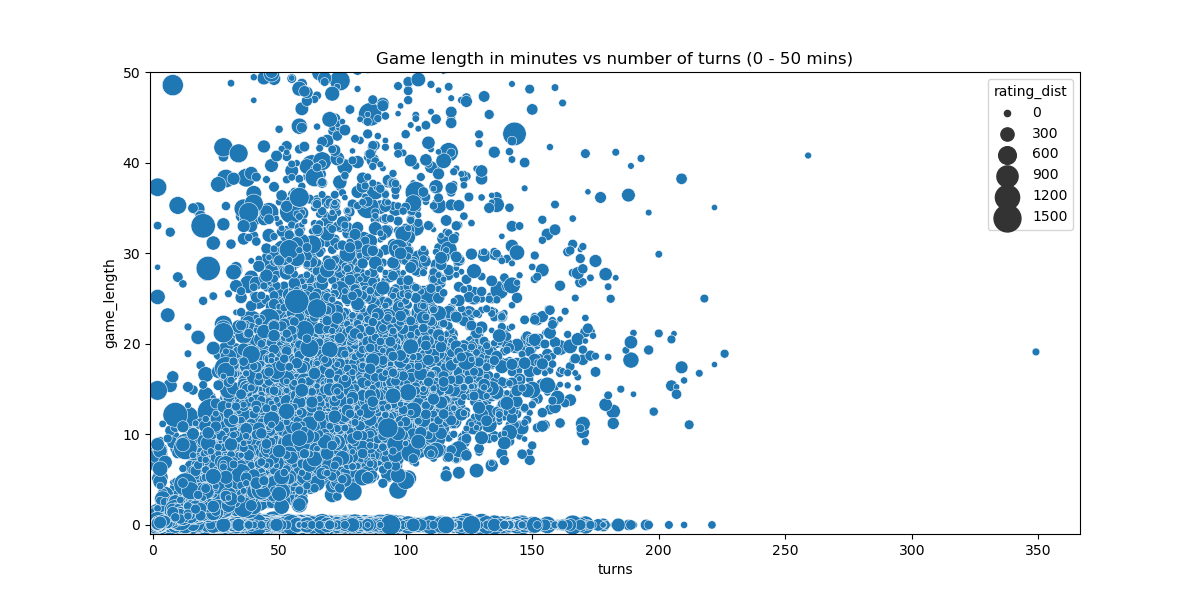

In [25]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=dataset, x='turns', y='game_length', size='rating_dist', sizes=(20, 400))

plt.title('Game length in minutes vs number of turns (0 - 50 mins)')
plt.xlim((-1))
plt.ylim((-1, 50))

plt.show()

<IPython.core.display.Javascript object>


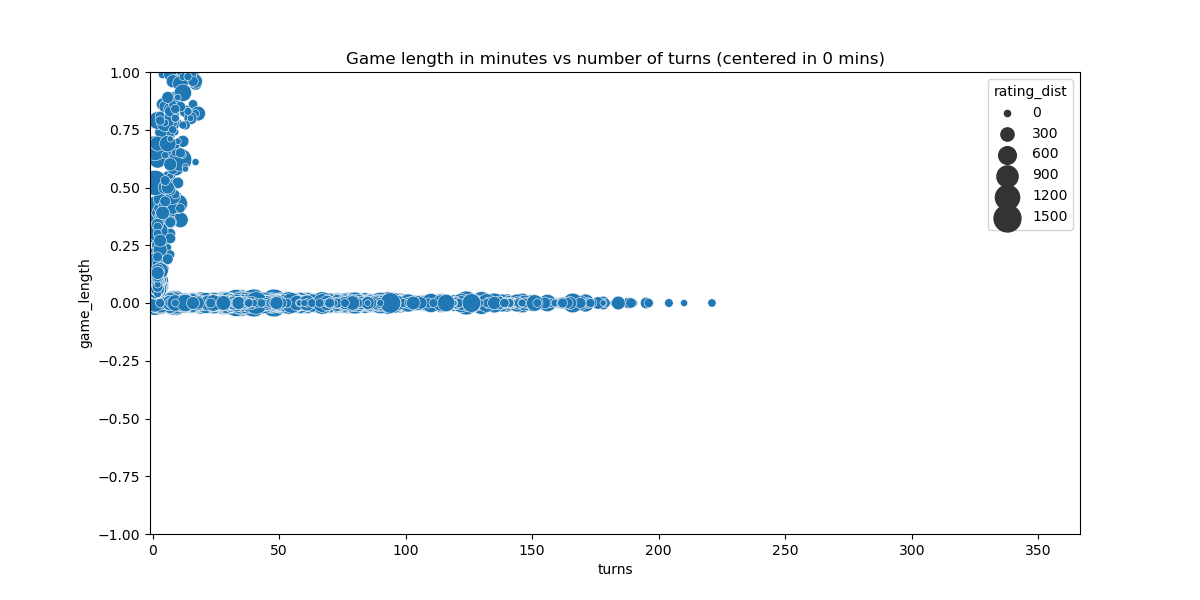

In [26]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=dataset, x='turns', y='game_length', size='rating_dist', sizes=(20, 400))

plt.title('Game length in minutes vs number of turns (centered in 0 mins)')
plt.xlim((-1))
plt.ylim((-1, 1))

plt.show()

In [27]:
# Veient els diferents gràfics identifiquem dos punts on es concentra l'atribut 'game_length', són en el 166.67 i el 0.
# Mirem quantes mostres prensenten aquests síntomes

n1 = len(dataset[dataset["game_length"] == 166.67])
n2 = len(dataset[dataset["game_length"] == 0])

print("Hi ha", n1, "partides amb un temps de joc de 166.7 minuts.")
print("Hi ha", n2, "partides amb un temps de joc de 0 minuts.")

per = (n1 + n2)/llargada * 100

print("El", format(per, '.2f'), "% de les partides del dataset tenen un temps de joc de 0 o 166.7 minuts.")

Hi ha 734 partides amb un temps de joc de 166.7 minuts.
Hi ha 8548 partides amb un temps de joc de 0 minuts.
El 46.28 % de les partides del dataset tenen un temps de joc de 0 o 166.7 minuts.


In [28]:
# Un 46% de les partides amb aquest temps indica que hi ha hagut algun error, així que es desestimarà l'atribut 
# La desestimació d'aquest atribut es pot fer sense problemes ja que en tenim un altre ('turns') que també estima la 
# llargada de la partida

dataset = dataset.drop('game_length', axis=1)
dataset = dataset.drop('created_at', axis=1)
dataset = dataset.drop('last_move_at', axis=1)
dataset.head()

,id,rated,turns,victory_status_outoftime,victory_status_resign,victory_status_mate,victory_status_draw,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rated_bi,rating_dist
0,TZJHLljE,False,13,1.000,0.000,0.000,0.000,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0,309
1,l1NXvwaE,True,16,0.000,1.000,0.000,0.000,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1,61
2,mIICvQHh,True,61,0.000,0.000,1.000,0.000,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1,4
3,kWKvrqYL,True,61,0.000,0.000,1.000,0.000,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1,15
4,9tXo1AUZ,True,95,0.000,0.000,1.000,0.000,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1,54


In [29]:
# Ara mirem si hi ha partides duplicades
duplicats = dataset[dataset['id'].duplicated()]

print("En el dataset hi ha", len(duplicats), "duplicats. Que representa un", format(len(duplicats)/llargada*100, '.2f'),"%.")

En el dataset hi ha 945 duplicats. Que representa un 4.71 %.


In [30]:
# Es comprova que tots els atributs de les partides amb el 'id' igual també siguin iguals

def igual(arr):
    np_arr = arr.to_numpy()
    return (np_arr[0] == np_arr).all()

duplicats_id = dataset[dataset['id'].duplicated(keep=False)]['id'].values

def comprovant():
    for ID in duplicats_id:
        dupli = dataset[dataset['id'] == ID]
        for col in dupli:
            if(~igual(dupli[col])):
                return False
    return True

comprovant()

True

In [59]:
# Veiem que tots són iguals, així que eliminem les còpies (només deixant el primer)

dataset_not_duplicated = dataset.drop_duplicates(subset = 'id', keep='first')

In [60]:
len(dataset) - len(dataset_not_duplicated)

945